# Developing countries prioritization by clustering 
![](https://storage.googleapis.com/kaggle-datasets-images/407681/781180/c86b740f796185ad25bfcc7004e77d43/dataset-cover.jpg?t=2019-11-06-10-47-50)

# Problem: 
<a href="https://www.kaggle.com/hellbuoy/humanitarian-aid-pca-clustering" target="target">Kaggle challenge</a>
Which country needs financial aid/ social projects the most? <br/>
# Approach: 
Prioritize the countries using some socio-economic and health factors that determine the overall development of the country. 
#### Steps:

1. [Loading the Data](#1)
1. [Data Cleansing](#2)
1. [Data Visualization](#3)
1. [Data Preparation](#4) 
1. [Dimensionality reduction](#5)
1. [Model Building](#6)
1. [Concluding results](#7)    

<a id="1"></a> <br>
## 1. Loading the Data

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

pd.set_option('max_colwidth', 500)
pd.set_option('display.max_columns', 500)
plt.rcParams['figure.figsize'] = [15,8]
sns.set(style='darkgrid')

pd.options.display.float_format='{:.4f}'.format
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from pyclustertend import hopkins

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# Columns meanings:
df_desc = pd.read_csv('data-dictionary.csv')
df_desc

Column Name  \
0     country   
1  child_mort   
2     exports   
3      health   
4     imports   
5      Income   
6   Inflation   
7  life_expec   
8   total_fer   
9        gdpp   

                                                                                                        Description  
0                                                                                               Name of the country  
1                                                       Death of children under 5 years of age per 1000 live births  
2                                                     Exports of goods and services. Given as %age of the Total GDP  
3                                                                        Total health spending as %age of Total GDP  
4                                                     Imports of goods and services. Given as %age of the Total GDP  
5                                                                                             Net income per person  
6                                                        The measurement of the annual growth rate of the Total GDP  
7  The average number of years a new born child would live if the current mortality patterns are to remain the same  
8       The number of children that would be born to each woman if the current age-fertility rates remain the same.  
9                                  The GDP per capita. Calculated as the Total GDP divided by the total population.

In [3]:
df_country = pd.read_csv('./Country-data.csv')
df_country.shape

(167, 10)

In [4]:
df_country.sample(10)

country  child_mort  exports  health  imports  income  \
45   Dominican Republic     34.4000  22.7000  6.2200  33.3000   11100   
111         New Zealand      6.2000  30.3000 10.1000  28.0000   32300   
13             Barbados     14.2000  39.5000  7.9700  48.7000   15300   
124             Romania     11.5000  32.6000  5.5800  38.8000   17800   
78               Jordan     21.1000  48.3000  8.0400  69.0000    9470   
53              Finland      3.0000  38.7000  8.9500  37.4000   39800   
29               Canada      5.6000  29.1000 11.3000  31.0000   40700   
81             Kiribati     62.7000  13.3000 11.3000  79.9000    1730   
89                Libya     16.6000  65.6000  3.8800  42.1000   29600   
12           Bangladesh     49.4000  16.0000  3.5200  21.8000    2440   

     inflation  life_expec  total_fer   gdpp  
45      5.4400     74.6000     2.6000   5450  
111     3.7300     80.9000     2.1700  33700  
13      0.3210     76.7000     1.7800  16000  
124     3.5300     73.7000     1.5900   8230  
78      8.4300     75.8000     3.6600   3680  
53      0.3510     80.0000     1.8700  46200  
29      2.8700     81.3000     1.6300  47400  
81      1.5200     60.7000     3.8400   1490  
89     14.2000     76.1000     2.4100  12100  
12      7.1400     70.4000     2.3300    758

In [5]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
df_country.describe()

child_mort  exports   health  imports      income  inflation  \
count    167.0000 167.0000 167.0000 167.0000    167.0000   167.0000   
mean      38.2701  41.1090   6.8157  46.8902  17144.6886     7.7818   
std       40.3289  27.4120   2.7468  24.2096  19278.0677    10.5707   
min        2.6000   0.1090   1.8100   0.0659    609.0000    -4.2100   
25%        8.2500  23.8000   4.9200  30.2000   3355.0000     1.8100   
50%       19.3000  35.0000   6.3200  43.3000   9960.0000     5.3900   
75%       62.1000  51.3500   8.6000  58.7500  22800.0000    10.7500   
max      208.0000 200.0000  17.9000 174.0000 125000.0000   104.0000   

       life_expec  total_fer        gdpp  
count    167.0000   167.0000    167.0000  
mean      70.5557     2.9480  12964.1557  
std        8.8932     1.5138  18328.7048  
min       32.1000     1.1500    231.0000  
25%       65.3000     1.7950   1330.0000  
50%       73.1000     2.4100   4660.0000  
75%       76.8000     3.8800  14050.0000  
max       82.8000     7.4900 105000.0000

<a id="2"></a> <br>
## 2. Data Cleansing

In [7]:
print('Missing values?')
nulls_country = df_country.isna().mean()*100
nulls_country

Missing values?


country      0.0000
child_mort   0.0000
exports      0.0000
health       0.0000
imports      0.0000
income       0.0000
inflation    0.0000
life_expec   0.0000
total_fer    0.0000
gdpp         0.0000
dtype: float64

In [8]:
print('Duplicated values?')
df_country.loc[df_country.duplicated()]

Duplicated values?


Empty DataFrame
Columns: [country, child_mort, exports, health, imports, income, inflation, life_expec, total_fer, gdpp]
Index: []

In [9]:
# Datatype check for the dataframe
df_country.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

None of the columns have inconsistent datatype, hence no conversion is required

<a id="3"></a> <br>
# 3. Data Visualization

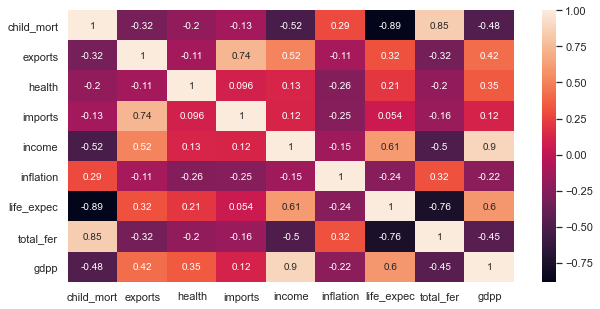

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(df_country.corr(), annot=True)

`gdpp` and `income` have strong positive correlation (0.9)
<br/>`child_mort` and `total_fer` have strong positive correlation (0.85)
<br/>`child_mort` and `life_expec` have strong negative correlation (-0.89)
<br/>`total_fer` and `life_expec` have strong negative correlation (-0.76)

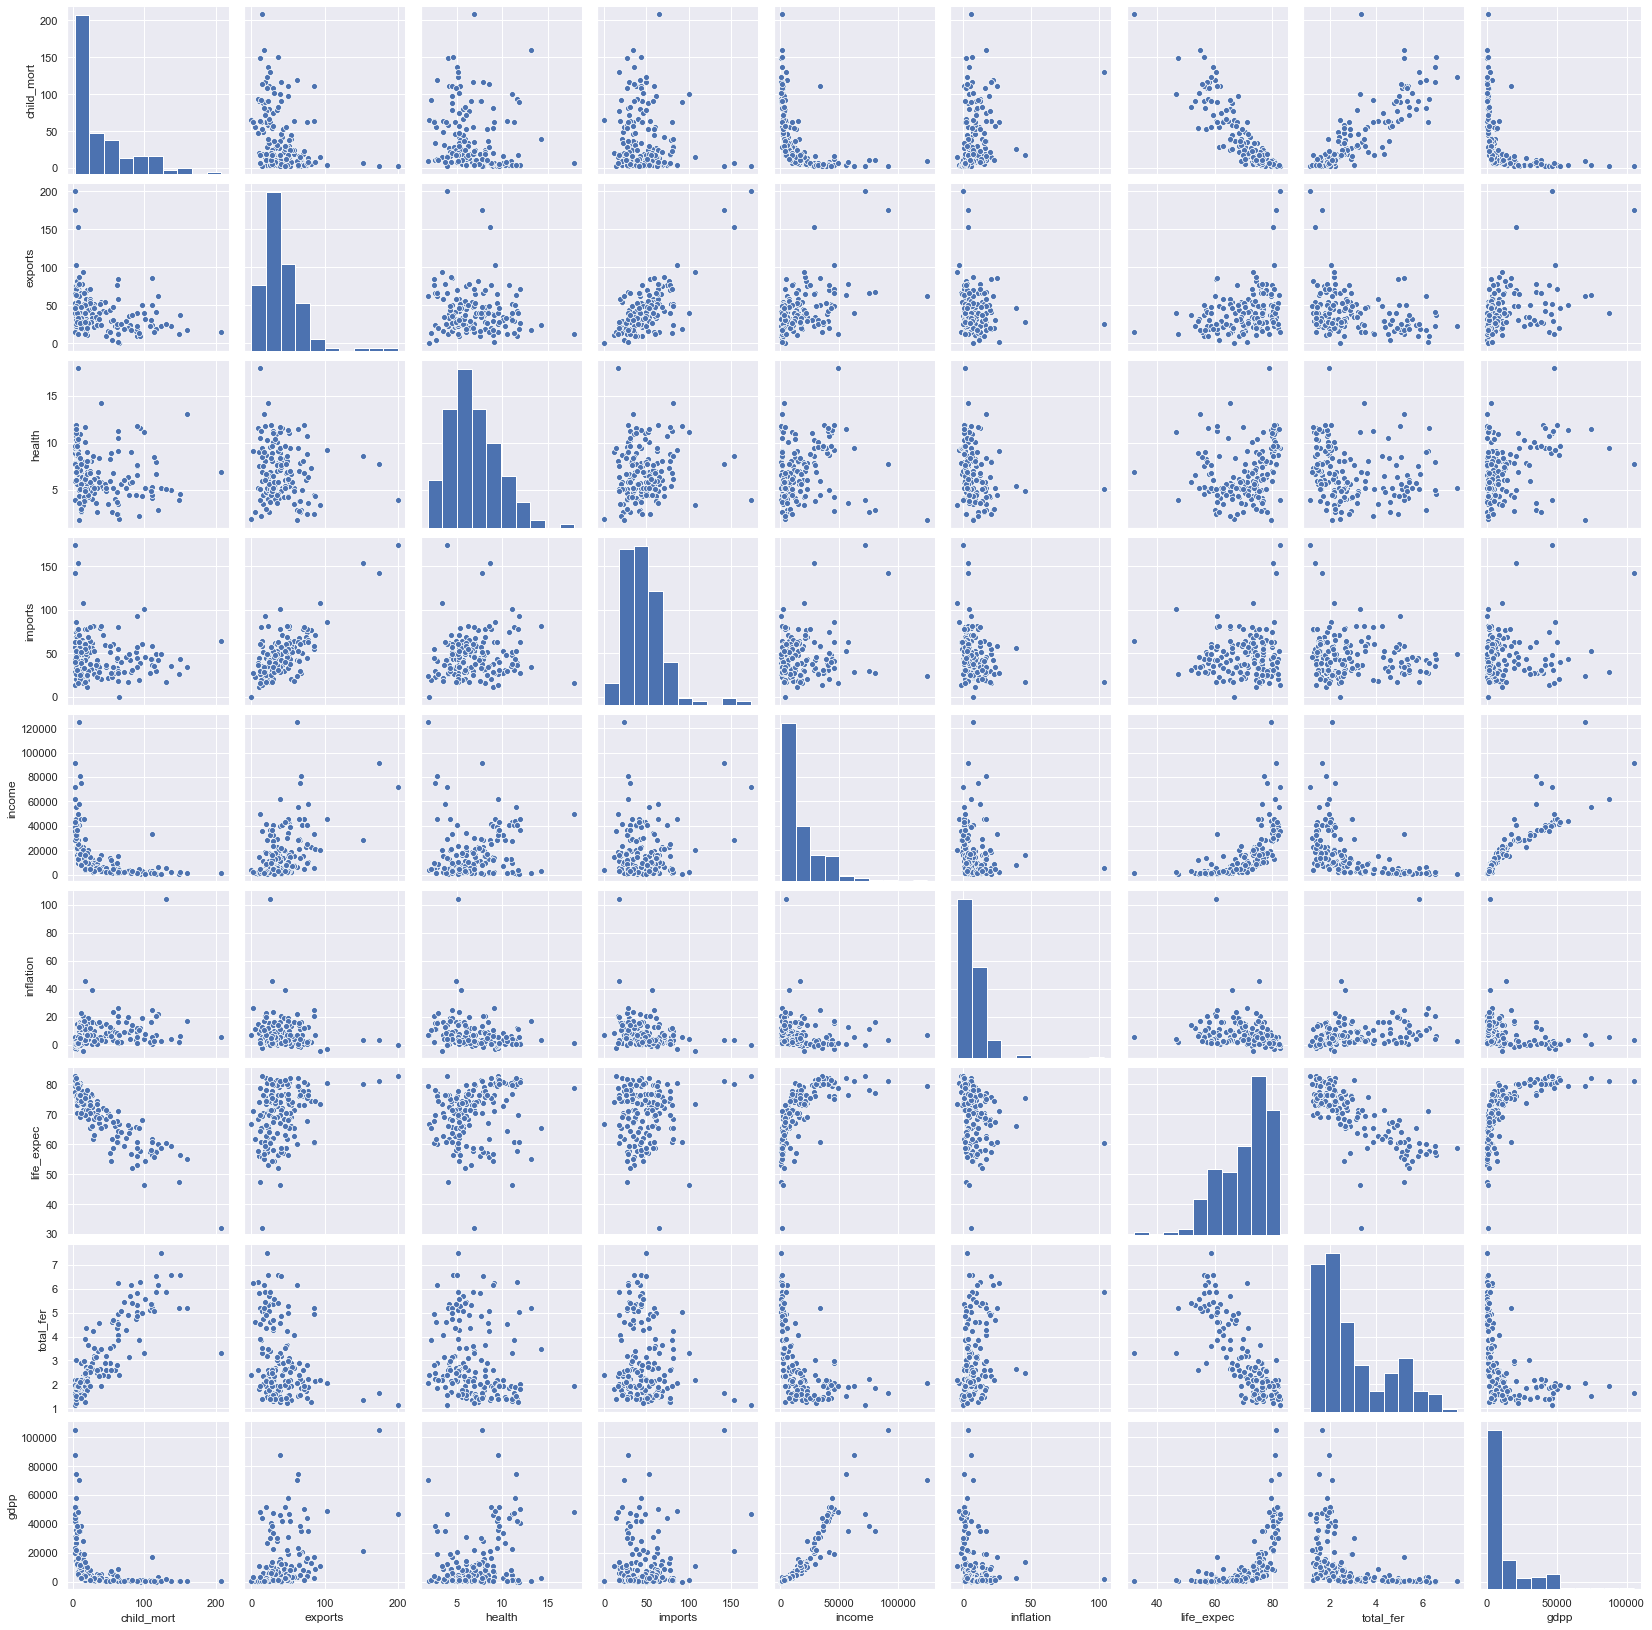

In [11]:
sns.pairplot(df_country)

When the `income` increase: the `life_expec` increase as well as the `child_mort` decrease.<br/>
As GDP per capita increases, life expectancy increases.<br/>

<a id="4"></a> <br>
# 4. Data Preparation

Deducing `imports`, `exports` and `health` spending from percentage values to actual values of their GDP per capita.<br/>Because the percentage values don't give a clear picture of that country. <br/>For example Austria and Belarus have almost same exports % but their `gdpp` has a huge gap which doesn't give an accurate idea of which country is more developed than the other.

In [12]:
# Converting exports,imports and health spending percentages to absolute values.

df_country['exports'] = df_country['exports'] * df_country['gdpp']/100
df_country['imports'] = df_country['imports'] * df_country['gdpp']/100
df_country['health'] = df_country['health'] * df_country['gdpp']/100

In [13]:
df_country.sample()

country  child_mort  exports  health  imports  income  inflation  \
59   Ghana     74.7000 386.4500 68.3820 601.2900    3060    16.6000   

    life_expec  total_fer  gdpp  
59     62.2000     4.2700  1310

In [14]:
# We can drop the country column as it doesn't add any indication, we consider it as a categorical ID, 
# we also do the calues standardization later so we only need the numerical values
df_country_dropped = df_country.copy()
country = df_country_dropped.pop('country')

In [15]:
features_nbr = len(df_country_dropped.columns)
print("original data columns:  ", features_nbr)
features = list(df_country_dropped)
features

original data columns:   9


['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [16]:
df_country_dropped.head(5)

child_mort   exports   health   imports  income  inflation  life_expec  \
0     90.2000   55.3000  41.9174  248.2970    1610     9.4400     56.2000   
1     16.6000 1145.2000 267.8950 1987.7400    9930     4.4900     76.3000   
2     27.3000 1712.6400 185.9820 1400.4400   12900    16.1000     76.5000   
3    119.0000 2199.1900 100.6050 1514.3700    5900    22.4000     60.1000   
4     10.3000 5551.0000 735.6600 7185.8000   19100     1.4400     76.8000   

   total_fer   gdpp  
0     5.8200    553  
1     1.6500   4090  
2     2.8900   4460  
3     6.1600   3530  
4     2.1300  12200

In [17]:
# Standarizing features via scaling
scaler = StandardScaler()
df_country_scaled = scaler.fit_transform(df_country_dropped)

In [18]:
df_country_scaled

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

<a id="5"></a> <br>
# 5. Dimensionality reduction

`svd_solver = "randomized"`: randomized SVD. 
<br/>Linear dimensionality reduction using approximated Singular Value Decomposition of the data and keeping only the most significant singular vectors to project the data to a lower dimensional space.

In [19]:
pca = PCA(svd_solver = "randomized", random_state = 42) #  integer seed 42 to control reproducibility.
pca_data = pca.fit(df_country_scaled)
pca_data

PCA(random_state=42, svd_solver='randomized')

In [20]:
## variance ratio (coverage)
variance = pca.explained_variance_ratio_
print(variance)
print("Cumulative Explained Variance: " + str(np.cumsum(variance)[-1]))

[5.89372984e-01 1.84451685e-01 9.91147170e-02 6.07227801e-02
 3.02917253e-02 2.45982702e-02 9.39743701e-03 1.55641971e-03
 4.93981394e-04]
Cumulative Explained Variance: 0.9999999999999996


PCA1 captures 58.9% of the data, PCA2 captures 18.4% of the data, PCA3 captures 9.9% of the data<br/>
=> Cumulative Explained Variance: 87.2% <br/> Around 90% of the data is covered by the first 3 principal components

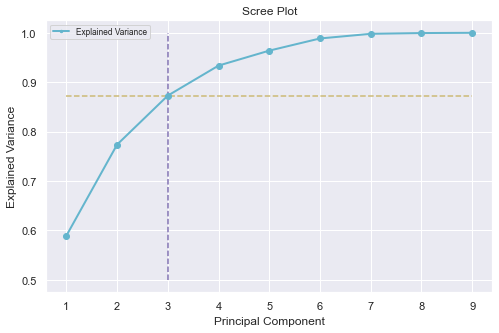

In [21]:
num_pc = features_nbr
fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(num_pc) + 1
plt.plot(np.arange(num_pc) + 1, np.cumsum(variance), 'co-', linewidth=2)
plt.vlines(x=3, ymax=1, ymin=0.5, colors="m", linestyles="--")
plt.hlines(y=0.872, xmax=9, xmin=1, colors="y", linestyles="--")

plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')

leg = plt.legend(['Explained Variance'], loc='best', borderpad=0.3, 
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'),
                 markerscale=0.4)

In [22]:
for x in range(0,3):
    # Let's get the top components of PCx:
    print("top components of PC" + str(x+1) + ":")
    rel_values = np.abs(pca.components_[x])/np.sum(np.abs(pca.components_[x]))
    print("Feature Names: " + str([features[i] for i in np.argsort(-rel_values)[:3]]))
    print("Percentages: " + str(rel_values[np.argsort(-rel_values)[:3]]))
    print()

top components of PC1:
Feature Names: ['gdpp', 'income', 'health']
Percentages: [0.13639867 0.12959666 0.12226292]

top components of PC2:
Feature Names: ['child_mort', 'total_fer', 'exports']
Percentages: [0.1713675  0.16541181 0.14295789]

top components of PC3:
Feature Names: ['inflation', 'life_expec', 'child_mort']
Percentages: [0.55541965 0.11522314 0.08785124]



In [23]:
pca_df = pd.DataFrame({'Features':features, 'PC_1':pca.components_[0],'PC_2':pca.components_[1],'PC_3':pca.components_[2]})
pca_df

Features    PC_1    PC_2    PC_3
0  child_mort -0.3164  0.4763 -0.1500
1     exports  0.3429  0.3973 -0.0306
2      health  0.3585  0.1551 -0.0757
3     imports  0.3449  0.3708 -0.0722
4      income  0.3800  0.1284  0.1458
5   inflation -0.1431  0.2213  0.9484
6  life_expec  0.3439 -0.3698  0.1968
7   total_fer -0.3028  0.4597 -0.0778
8        gdpp  0.4000  0.2006  0.0103

In [24]:
fig = px.scatter_3d(pca_df, x='PC_1', y='PC_2', z='PC_3', color = 'Features')
fig.show()

- `life expectency`, `income`, `gdpp` and `health` are very well explained by PC1.
- `child mortality` and `total fertility` are well explained by PC2.
- `inflation` is well explained by PC3.
- `imports` and `exports` are well explained by both the components PC1 and PC2.

In [25]:
# Building the dataframe using Incremental PCA for better efficiency.
inc_pca = IncrementalPCA(n_components=3)
df_inc_pca = inc_pca.fit_transform(df_country_scaled)

In [26]:
df_pca = pd.DataFrame(df_inc_pca, columns=["PC_1", "PC_2","PC_3"])
df_pca_final = pd.concat([country, df_pca], axis=1)
df_pca_final.sample(5)

country    PC_1    PC_2    PC_3
74       Israel  1.7833 -0.3985 -0.1299
68      Iceland  3.1004  0.1666  0.1955
75        Italy  2.5530 -0.7771 -0.1706
161  Uzbekistan -1.0306 -0.5629  0.7432
77        Japan  2.8586 -0.8799 -0.3493

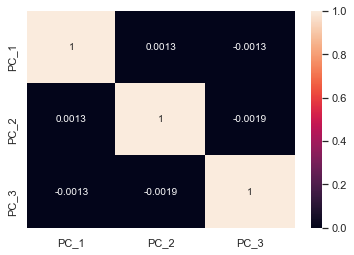

In [27]:
sns.heatmap(df_pca_final.corr(), annot = True)

Correlation among the attributes is close to 0 so we can say there is no more dependency in the dataset.

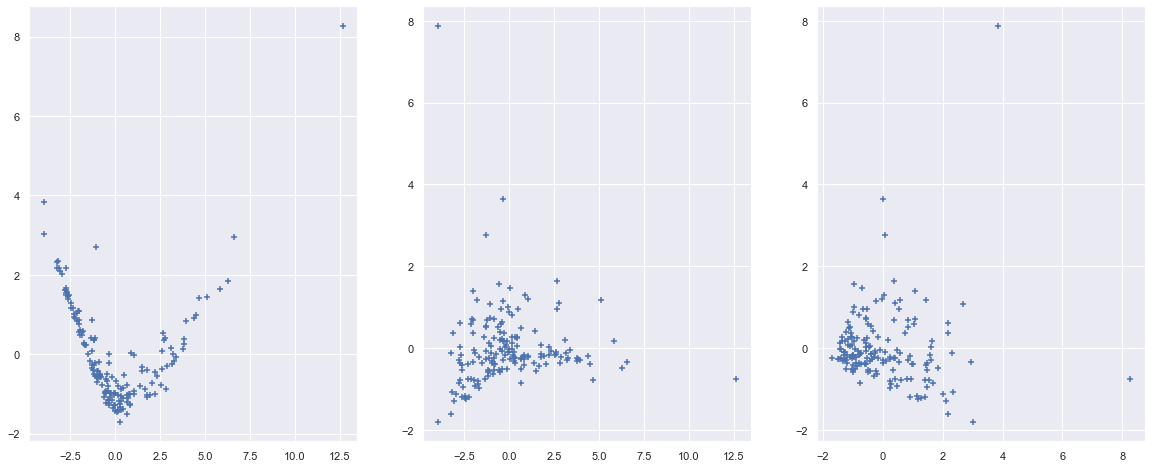

In [28]:
plt.figure(figsize =(20,8))
plt.subplot(1,3,1)
plt.scatter(df_pca_final['PC_1'], df_pca_final['PC_2'], marker = '+')
plt.subplot(1,3,2)
plt.scatter(df_pca_final['PC_1'], df_pca_final['PC_3'], marker = '+')
plt.subplot(1,3,3)
plt.scatter(df_pca_final['PC_2'], df_pca_final['PC_3'], marker = '+')

We notice the presence of outliers.

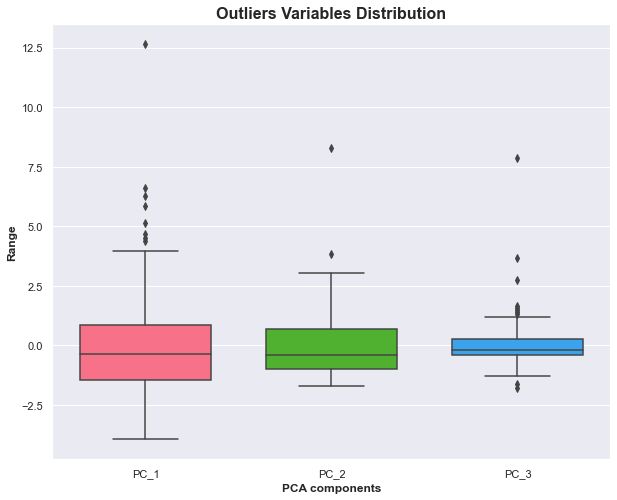

In [29]:
# Outliers Analysis with BoxPlots
components = ['PC_1', 'PC_2', 'PC_3']
plt.figure(figsize=(10,8))
plt.title("Outliers Variables Distribution", fontsize = 16, fontweight= 'bold')
plt.xlabel("PCA components", fontweight= 'bold')
plt.ylabel("Range", fontweight= 'bold')
sns.boxplot(data = df_pca_final[components], orient='v', palette='husl', whis=1.5,saturation=1, width=0.7)

In [30]:
# PC_1
Q1 = df_pca_final.PC_1.quantile(0.05)
Q3 = df_pca_final.PC_1.quantile(0.95)
df_pca_final = df_pca_final[(df_pca_final.PC_1 >= Q1) & (df_pca_final.PC_1 <= Q3)]

# PC_2
Q1 = df_pca_final.PC_2.quantile(0.05)
Q3 = df_pca_final.PC_2.quantile(0.95)
df_pca_final = df_pca_final[(df_pca_final.PC_2 >= Q1) & (df_pca_final.PC_2 <= Q3)]

# PC_3
Q1 = df_pca_final.PC_3.quantile(0.05)
Q3 = df_pca_final.PC_3.quantile(0.95)
df_pca_final = df_pca_final[(df_pca_final.PC_3 >= Q1) & (df_pca_final.PC_3 <= Q3)]

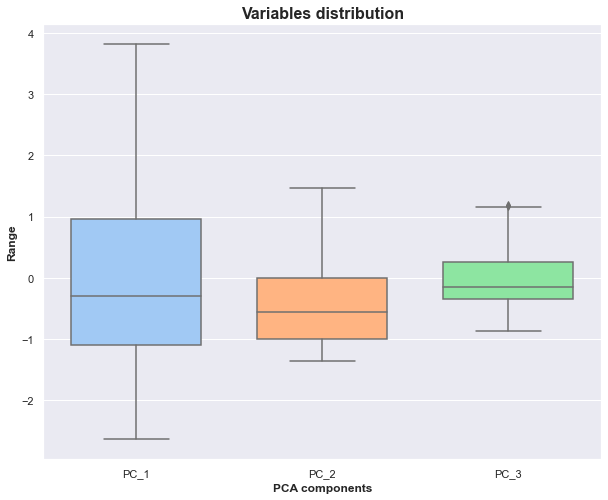

In [31]:
plt.figure(figsize=(10,8))
plt.title("Variables distribution", fontsize=16, fontweight='bold')
plt.xlabel("PCA components", fontweight='bold')
plt.ylabel("Range", fontweight='bold')

sns.boxplot(data = df_pca_final[components], orient='v', whis = 1.5, saturation = 1, palette = 'pastel', width = 0.7)

In [32]:
df_pca_final.head(5)

country    PC_1    PC_2    PC_3
0          Afghanistan -2.6374  1.4690 -0.5414
2              Algeria -0.4576 -0.6733  0.9619
4  Antigua and Barbuda  0.6498 -1.0244 -0.2501
6              Armenia -0.3327 -1.2745  0.1766
7            Australia  3.1804 -0.2508 -0.1169

In [33]:
df_pca_final = df_pca_final.reset_index(drop=True)
df_pca_numeric_data = df_pca_final.drop(['country'],axis=1)
df_pca_numeric_data.head(5)

PC_1    PC_2    PC_3
0 -2.6374  1.4690 -0.5414
1 -0.4576 -0.6733  0.9619
2  0.6498 -1.0244 -0.2501
3 -0.3327 -1.2745  0.1766
4  3.1804 -0.2508 -0.1169

### Hopkins test
From the <a href="https://pyclustertend.readthedocs.io/en/latest/" target="target">Package documentation</a>:
"A statistical test which allow to guess if the data follow an uniform distribution. <br/>If the hopkins score tends to 0 => The data is not uniformly distributed. Hence clustering can be useful to classify the observations. <br/>if the score is too high (above 0.5 for exemple) => the data is uniformly distributed and clustering can’t be really useful for the problem at hand."

In [34]:
hopkins(df_pca_numeric_data, len(df_pca_numeric_data)) 
# As the dataset is not big, we take the sampling size as the whole ds

0.26208323068838557

<a id="6"></a> <br>
# 6. Model Building

## 6.1 KMeans Clustering:

In [35]:
kvals = []
wsses = []
for k in range(2,9):
    kmeans = KMeans(n_clusters=k, random_state= 0)
    model = kmeans.fit(df_pca_numeric_data)
    wsse = model.inertia_
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_pca_numeric_data, cluster_labels)
    kvals.append(k)
    wsses.append(wsse)
    print("k={}, Set Sum of Squared Errors= {}".format(k, wsse))
    print("For n_clusters={0}, the silhouette score is {1}".format(k, silhouette_avg))
    print("\n")

k=2, Set Sum of Squared Errors= 172.59700820690244
For n_clusters=2, the silhouette score is 0.4873400103541441


k=3, Set Sum of Squared Errors= 91.26428788897097
For n_clusters=3, the silhouette score is 0.4639771456218248


k=4, Set Sum of Squared Errors= 68.60223211679364
For n_clusters=4, the silhouette score is 0.3987356568367148


k=5, Set Sum of Squared Errors= 54.870079854582414
For n_clusters=5, the silhouette score is 0.36170980333920066


k=6, Set Sum of Squared Errors= 46.44586981971067
For n_clusters=6, the silhouette score is 0.3660635304732296


k=7, Set Sum of Squared Errors= 39.510897031652995
For n_clusters=7, the silhouette score is 0.37560668451142154


k=8, Set Sum of Squared Errors= 33.57855293840437
For n_clusters=8, the silhouette score is 0.37556755376127404




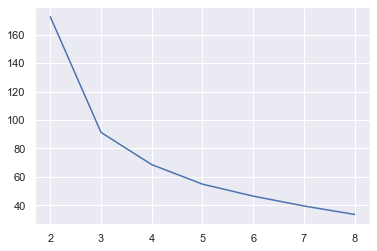

In [36]:
plt.plot(kvals, wsses)

Using the elbow method, we can choose 4 or 5. <br/>To find the ideal number of clusters for K-means clustering we can also refer to the Silhouette Score.

In [37]:
clusters_5 = KMeans(n_clusters = 5, random_state = 0)
clusters_5.fit(df_pca_numeric_data)

KMeans(n_clusters=5, random_state=0)

In [38]:
clusters_5.labels_

array([3, 4, 2, 4, 1, 1, 4, 2, 2, 0, 2, 4, 0, 0, 0, 3, 4, 4, 0, 1, 0, 4,
       4, 4, 3, 3, 2, 1, 2, 4, 4, 0, 4, 3, 2, 0, 1, 1, 3, 3, 4, 1, 3, 2,
       4, 0, 0, 2, 1, 0, 0, 4, 3, 2, 1, 4, 1, 4, 4, 3, 1, 0, 3, 2, 3, 4,
       2, 3, 4, 4, 1, 3, 4, 0, 4, 0, 0, 3, 0, 1, 2, 3, 4, 4, 4, 0, 2, 2,
       4, 4, 3, 0, 2, 2, 2, 3, 3, 2, 2, 4, 3, 4, 1, 0, 3, 0, 4, 4, 0, 3,
       4, 1, 1, 1, 4, 0, 0, 4, 3], dtype=int32)

In [39]:
df_pca_final['cluster_id']=clusters_5.labels_
df_pca_final.head()

country    PC_1    PC_2    PC_3  cluster_id
0          Afghanistan -2.6374  1.4690 -0.5414           3
1              Algeria -0.4576 -0.6733  0.9619           4
2  Antigua and Barbuda  0.6498 -1.0244 -0.2501           2
3              Armenia -0.3327 -1.2745  0.1766           4
4            Australia  3.1804 -0.2508 -0.1169           1

In [40]:
df_pca_final['cluster_id'].value_counts() # nbr of countries in each cluster

4    35
0    24
3    23
2    20
1    17
Name: cluster_id, dtype: int64

In [41]:
px.scatter_3d(df_pca_final, x='PC_1', y='PC_2', z='PC_3', color='cluster_id')

We notice there is a lot of lot of intra-distance between the cluster elements, which is not a good sign. We change n_clusters to 4 and notice the same.

Let's visualize clusters original data:

In [42]:
df_merged = pd.merge(df_country, df_pca_final, on='country')
df_merged

country  child_mort    exports    health    imports  income  \
0            Afghanistan     90.2000    55.3000   41.9174   248.2970    1610   
1                Algeria     27.3000  1712.6400  185.9820  1400.4400   12900   
2    Antigua and Barbuda     10.3000  5551.0000  735.6600  7185.8000   19100   
3                Armenia     18.1000   669.7600  141.6800  1458.6600    6700   
4              Australia      4.8000 10276.2000 4530.8700 10847.1000   41400   
..                   ...         ...        ...       ...        ...     ...   
114              Uruguay     10.6000  3129.7000  993.6500  3022.6000   17100   
115           Uzbekistan     36.3000   437.4600   80.1780   393.3000    4240   
116              Vanuatu     29.2000  1384.0200  155.9250  1565.1900    2950   
117              Vietnam     23.3000   943.2000   89.6040  1050.6200    4490   
118                Yemen     56.3000   393.0000   67.8580   450.6400    4480   

     inflation  life_expec  total_fer   gdpp    PC_1    PC_2    PC_3  \
0       9.4400     56.2000     5.8200    553 -2.6374  1.4690 -0.5414   
1      16.1000     76.5000     2.8900   4460 -0.4576 -0.6733  0.9619   
2       1.4400     76.8000     2.1300  12200  0.6498 -1.0244 -0.2501   
3       7.7700     73.3000     1.6900   3220 -0.3327 -1.2745  0.1766   
4       1.1600     82.0000     1.9300  51900  3.1804 -0.2508 -0.1169   
..         ...         ...        ...    ...     ...     ...     ...   
114     4.9100     76.4000     2.0800  11900  0.4561 -1.0982  0.0490   
115    16.5000     68.8000     2.3400   1380 -1.0306 -0.5629  0.7432   
116     2.6200     63.0000     3.5000   2970 -1.1750 -0.2813 -0.6704   
117    12.1000     73.1000     1.9500   1310 -0.5924 -1.0782  0.5106   
118    23.6000     67.5000     4.6700   1310 -1.8015  0.5908  1.1778   

     cluster_id  
0             3  
1             4  
2             2  
3             4  
4             1  
..          ...  
114           4  
115           0  
116           0  
117           4  
118           3  

[119 rows x 14 columns]

In [43]:
df_merged.drop(['PC_1', 'PC_2', 'PC_3'], axis=1, inplace=True)
df_merged.sample(5)

country  child_mort    exports    health    imports  income  \
73  Micronesia, Fed. Sts.     40.0000   672.1000  406.1200  2316.6000    3340   
61        Kyrgyz Republic     29.6000   454.0800   54.3840   718.9600    2790   
74                Moldova     17.2000   638.9600  190.7100  1279.5500    3910   
53                 Israel      4.6000 10710.0000 2334.7800 10067.4000   29600   
90                 Rwanda     63.6000    67.5600   59.1150   168.9000    1350   

    inflation  life_expec  total_fer   gdpp  cluster_id  
73     3.8000     65.4000     3.4600   2860           0  
61    10.0000     68.5000     3.1000    880           0  
74    11.1000     69.7000     1.2700   1630           4  
53     1.7700     81.4000     3.0300  30600           2  
90     2.6100     64.6000     4.5100    563           3

In [44]:
# Calculating the means by category for each cluster
cluster_child = pd.DataFrame(df_merged.groupby('cluster_id').child_mort.mean())
cluster_health = pd.DataFrame(df_merged.groupby('cluster_id').health.mean())
cluster_life_expec = pd.DataFrame(df_merged.groupby('cluster_id').life_expec.mean())
cluster_total_fer = pd.DataFrame(df_merged.groupby('cluster_id').total_fer.mean())
cluster_exports = pd.DataFrame(df_merged.groupby('cluster_id').exports.mean())
cluster_imports = pd.DataFrame(df_merged.groupby('cluster_id').imports.mean())
cluster_inflation = pd.DataFrame(df_merged.groupby('cluster_id').inflation.mean())
cluster_income = pd.DataFrame(df_merged.groupby('cluster_id').income.mean())
cluster_gdpp = pd.DataFrame(df_merged.groupby('cluster_id').gdpp.mean())

In [45]:
clusters_means = pd.concat([cluster_child, cluster_health, cluster_life_expec, cluster_total_fer, 
                            cluster_exports, cluster_imports, cluster_inflation, cluster_income, cluster_gdpp], axis=1)
clusters_means.reset_index(level=0, inplace=True)
clusters_means.columns = ["Cluster_Id", "Child_Mortality", "Health_Spending", "Life_Expectancy", "Total_Fertility", "Exports", "Imports", "Inflation", "Income", "GDPpcapita"]
clusters_means

Cluster_Id  Child_Mortality  Health_Spending  Life_Expectancy  \
0           0          37.8875         123.4549          68.9583   
1           1           5.1412        3954.5006          80.4765   
2           2           7.1400        1442.0290          76.9150   
3           3          68.4783         135.8739          62.1696   
4           4          18.1686         411.1251          74.0457   

   Total_Fertility    Exports    Imports  Inflation     Income  GDPpcapita  
0           2.9537   896.5533  1187.5125     6.5259  5275.0000   2364.2500  
1           1.7765 16736.1118 15324.9353     2.8236 41705.8824  40911.7647  
2           1.7400  9374.4700  9371.0950     1.6395 26050.0000  18835.0000  
3           4.5074   884.7745   838.6342    10.7113  4650.8696   2152.7391  
4           2.1071  2622.8243  2635.5677     8.0534 13102.0000   6497.1429

Let's zoom on the `income` and `gdpp` (top components of PC1), `child_mort` (top component of PC2), `inflation`(top component of PC3)

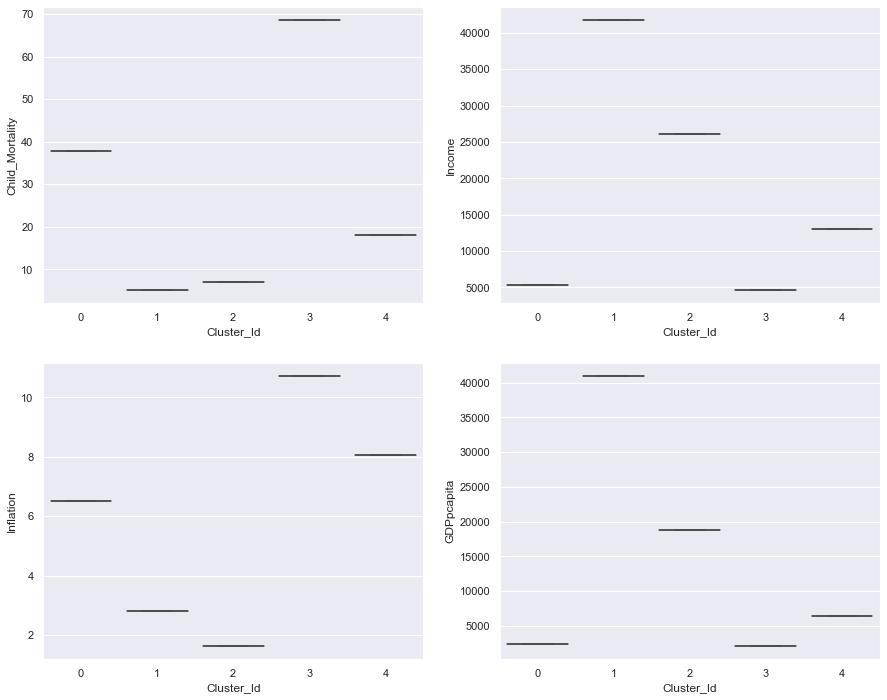

In [46]:
fig, axes = plt.subplots(2,2, figsize=(15,12))
sns.boxplot(x='Cluster_Id', y='Child_Mortality', data=clusters_means, ax=axes[0][0])
sns.boxplot(x='Cluster_Id', y='Income', data=clusters_means, ax=axes[0][1])
sns.boxplot(x='Cluster_Id', y='Inflation', data=clusters_means, ax=axes[1][0])
sns.boxplot(x='Cluster_Id', y='GDPpcapita', data=clusters_means, ax=axes[1][1])

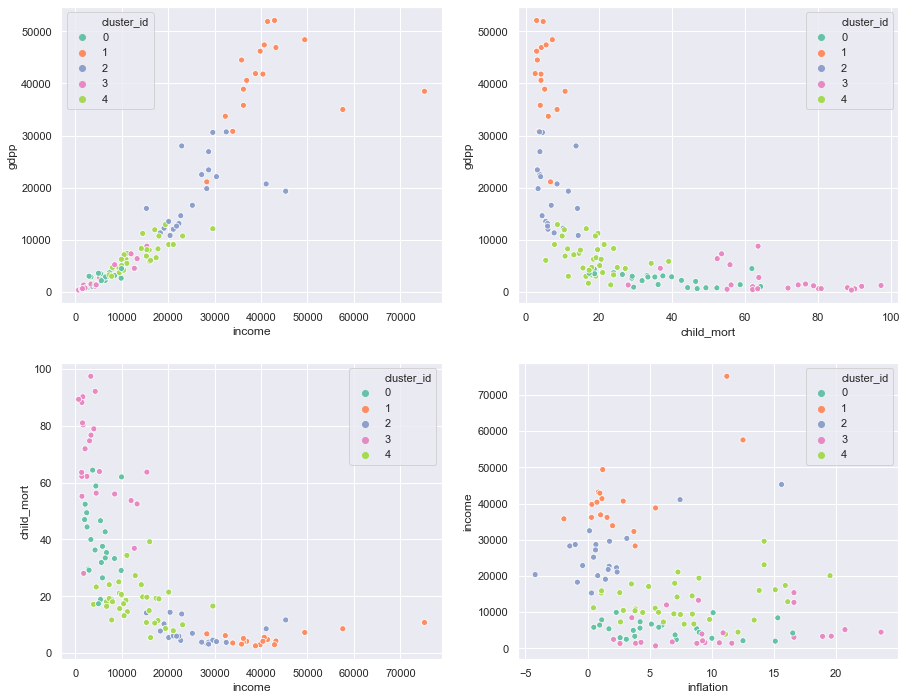

In [47]:
fig, axes = plt.subplots(2,2, figsize=(15,12))
sns.scatterplot(x='income', y='gdpp', hue='cluster_id', data=df_merged, palette='Set2',legend='full', ax=axes[0][0])
sns.scatterplot(x='child_mort', y='gdpp', hue='cluster_id', data=df_merged, palette='Set2',legend='full', ax=axes[0][1])
sns.scatterplot(x='income', y='child_mort', hue='cluster_id', data=df_merged, palette='Set2',legend='full', ax=axes[1][0])
sns.scatterplot(x='inflation', y='income', hue='cluster_id', data=df_merged, palette='Set2',legend='full', ax=axes[1][1])


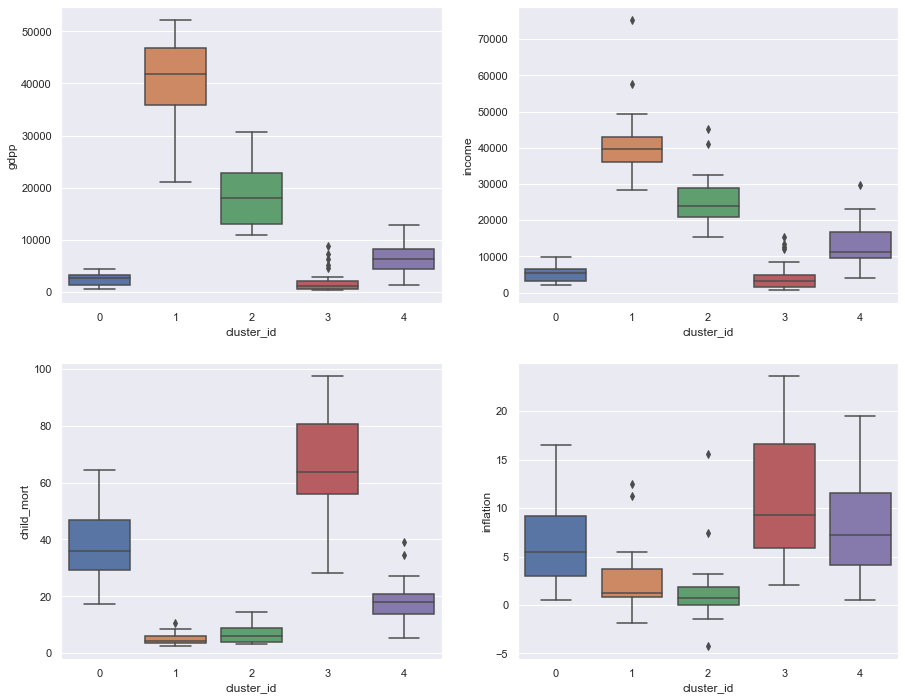

In [48]:
# BoxPlot to show the distribution of the original data by clusters
fig, axes = plt.subplots(2,2, figsize=(15,12))
sns.boxplot(x = 'cluster_id', y = 'gdpp', data=df_merged, ax=axes[0][0])
sns.boxplot(x = 'cluster_id', y = 'income', data=df_merged, ax=axes[0][1])
sns.boxplot(x = 'cluster_id', y = 'child_mort', data=df_merged, ax=axes[1][0])
sns.boxplot(x = 'cluster_id', y = 'inflation', data=df_merged, ax=axes[1][1])

We notice `child_mort` is highest for cluster 3 and 0, same for `income` and `gdpp` which are the lowest for the same clusters. Let's take a look at the countries of these clusters:

In [49]:
# Cluster 0 countries
df_merged[df_merged['cluster_id'] == 0].sort_values('child_mort', ascending=False)

country  child_mort   exports   health   imports  income  \
76                 Myanmar     64.4000    1.0769  19.4636    0.6511    3720   
108           Turkmenistan     62.0000 3387.7200 111.0000 1975.8000    9940   
49                   India     58.8000  305.1000  54.6750  365.8500    4410   
103             Tajikistan     52.4000  109.9620  44.1324  432.4680    2110   
9               Bangladesh     49.4000  121.2800  26.6816  165.2440    2440   
78                   Nepal     47.0000   56.7136  31.0800  215.4880    1990   
14                 Bolivia     46.6000  815.7600  95.8320  679.1400    5410   
18                Cambodia     44.4000  425.2260  44.6448  467.6700    2520   
13                  Bhutan     42.7000  926.5000 113.3600 1541.2600    6420   
73   Micronesia, Fed. Sts.     40.0000  672.1000 406.1200 2316.6000    3340   
46                  Guyana     37.6000 1562.5600 163.5520 2404.6400    5840   
115             Uzbekistan     36.3000  437.4600  80.1780  393.3000    4240   
45               Guatemala     35.4000  730.1400 193.8550 1027.2900    6710   
75                 Morocco     33.5000  911.2600 147.1600 1216.9000    6440   
50               Indonesia     33.3000  755.7300  81.1710  696.6400    8430   
85             Philippines     31.9000  741.2400  76.8930  779.5800    5600   
61         Kyrgyz Republic     29.6000  454.0800  54.3840  718.9600    2790   
116                Vanuatu     29.2000 1384.0200 155.9250 1565.1900    2950   
31                   Egypt     29.1000  553.8000 121.1600  691.6000    9860   
20              Cape Verde     26.5000 1082.3700 135.3790 2045.5800    5830   
35                    Fiji     24.1000 2109.7000 177.3900 2332.3500    7350   
91                   Samoa     18.9000 1007.4000 223.2150 1831.9500    5400   
12                  Belize     18.8000 2525.8800 225.6800 2495.5000    7880   
105                  Tonga     17.4000  440.2000 179.9850 2140.6500    4980   

     inflation  life_expec  total_fer  gdpp  cluster_id  
76      7.0400     66.8000     2.4100   988           0  
108     2.3100     67.9000     2.8300  4440           0  
49      8.9800     66.2000     2.6000  1350           0  
103    12.5000     69.6000     3.5100   738           0  
9       7.1400     70.4000     2.3300   758           0  
78     15.1000     68.3000     2.6100   592           0  
14      8.7800     71.6000     3.2000  1980           0  
18      3.1200     66.1000     2.8800   786           0  
13      5.9900     72.1000     2.3800  2180           0  
73      3.8000     65.4000     3.4600  2860           0  
46      5.7300     65.5000     2.6500  3040           0  
115    16.5000     68.8000     2.3400  1380           0  
45      5.1400     71.3000     3.3800  2830           0  
75      0.9760     73.5000     2.5800  2830           0  
50     15.3000     69.9000     2.4800  3110           0  
85      4.2200     69.0000     3.1600  2130           0  
61     10.0000     68.5000     3.1000   880           0  
116     2.6200     63.0000     3.5000  2970           0  
31     10.1000     70.5000     3.1900  2600           0  
20      0.5050     72.5000     2.6700  3310           0  
35      4.2300     65.3000     2.6700  3650           0  
91      1.7200     71.5000     4.3400  3450           0  
12      1.1400     71.4000     2.7100  4340           0  
105     3.6800     69.9000     3.9100  3550           0

In [50]:
# Cluster 3 countries
df_merged[df_merged['cluster_id'] == 3].sort_values('child_mort', ascending=False)

country  child_mort   exports   health   imports  income  \
71        Mauritania     97.4000  608.4000  52.9200  734.4000    3320   
81          Pakistan     92.1000  140.4000  22.8800  201.7600    4280   
0        Afghanistan     90.2000   55.3000  41.9174  248.2970    1610   
64           Liberia     89.3000   62.4570  38.5860  302.8020     700   
24           Comoros     88.2000  126.8850  34.6819  397.5730    1410   
109           Uganda     81.0000  101.7450  53.6095  170.1700    1540   
39            Gambia     80.3000  133.7560  31.9778  239.9740    1660   
62               Lao     78.9000  403.5600  50.9580  562.0200    3980   
100            Sudan     76.7000  291.5600  93.5360  254.5600    3370   
42             Ghana     74.7000  386.4500  68.3820  601.2900    3060   
104         Tanzania     71.9000  131.2740  42.1902  204.2820    2090   
25       Congo, Rep.     63.9000 2331.7400  67.4040 1498.7800    5190   
38             Gabon     63.7000 5048.7500 306.2500 1653.7500   15400   
90            Rwanda     63.6000   67.5600  59.1150  168.9000    1350   
59             Kenya     62.2000  200.1690  45.9325  324.9120    2480   
67        Madagascar     62.2000  103.2500  15.5701  177.5900    1390   
118            Yemen     56.3000  393.0000  67.8580  450.6400    4480   
77           Namibia     56.0000 2480.8200 351.8820 3150.3300    8460   
33           Eritrea     55.2000   23.0878  12.8212  112.3060    1420   
96      South Africa     53.7000 2082.0800 650.8320 1994.7200   12000   
15          Botswana     52.5000 2768.6000 527.0500 3257.5500   13300   
52              Iraq     36.9000 1773.0000 378.4500 1534.5000   12700   
95   Solomon Islands     28.1000  635.9700 110.2950 1047.4800    1780   

     inflation  life_expec  total_fer  gdpp  cluster_id  
71     18.9000     68.2000     4.9800  1200           3  
81     10.9000     65.3000     3.8500  1040           3  
0       9.4400     56.2000     5.8200   553           3  
64      5.4700     60.8000     5.0200   327           3  
24      3.8700     65.9000     4.7500   769           3  
109    10.6000     56.8000     6.1500   595           3  
39      4.3000     65.5000     5.7100   562           3  
62      9.2000     63.8000     3.1500  1140           3  
100    19.6000     66.3000     4.8800  1480           3  
42     16.6000     62.2000     4.2700  1310           3  
104     9.2500     59.3000     5.4300   702           3  
25     20.7000     60.4000     4.9500  2740           3  
38     16.6000     62.9000     4.0800  8750           3  
90      2.6100     64.6000     4.5100   563           3  
59      2.0900     62.8000     4.3700   967           3  
67      8.7900     60.8000     4.6000   413           3  
118    23.6000     67.5000     4.6700  1310           3  
77      3.5600     58.6000     3.6000  5190           3  
33     11.6000     61.7000     4.6100   482           3  
96      6.3500     54.3000     2.5900  7280           3  
15      8.9200     57.1000     2.8800  6350           3  
52     16.6000     67.2000     4.5600  4500           3  
95      6.8100     61.7000     4.2400  1290           3

## 6.2 Hierarchical clustering:

**Single Linkage & Complete Linkage**:<br/>

"Single Linkage is a method that focused on minimum distances or nearest neighbor between clusters meanwhile Complete Linkage concentrates on maximum distance or furthest neighbor between clusters".<br/>

<table><tr><td><img src='https://www.saedsayad.com/images/Clustering_single.png'></td><td><img src='https://www.saedsayad.com/images/Clustering_complete.png'></td></tr></table>

In [51]:
df_pca_numeric_data

PC_1    PC_2    PC_3
0   -2.6374  1.4690 -0.5414
1   -0.4576 -0.6733  0.9619
2    0.6498 -1.0244 -0.2501
3   -0.3327 -1.2745  0.1766
4    3.1804 -0.2508 -0.1169
..      ...     ...     ...
114  0.4561 -1.0982  0.0490
115 -1.0306 -0.5629  0.7432
116 -1.1750 -0.2813 -0.6704
117 -0.5924 -1.0782  0.5106
118 -1.8015  0.5908  1.1778

[119 rows x 3 columns]

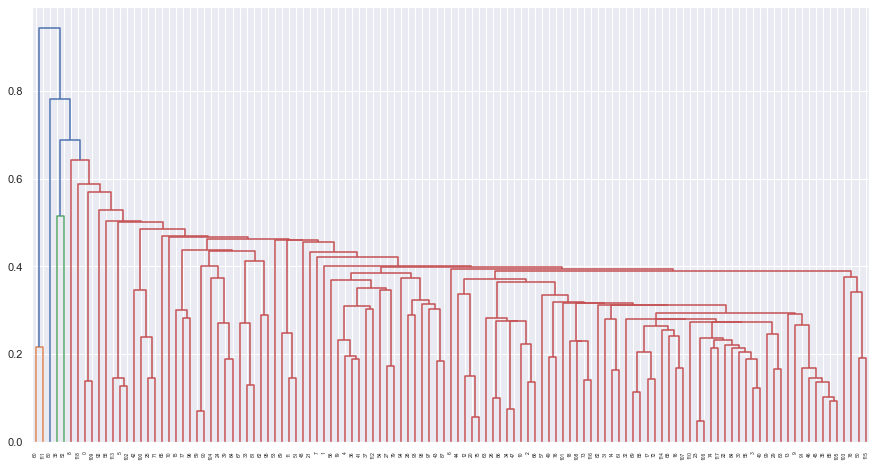

In [52]:
# Single Linkage
plt.rcParams['figure.figsize'] = [15,8]
mergings = linkage(df_pca_numeric_data, method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

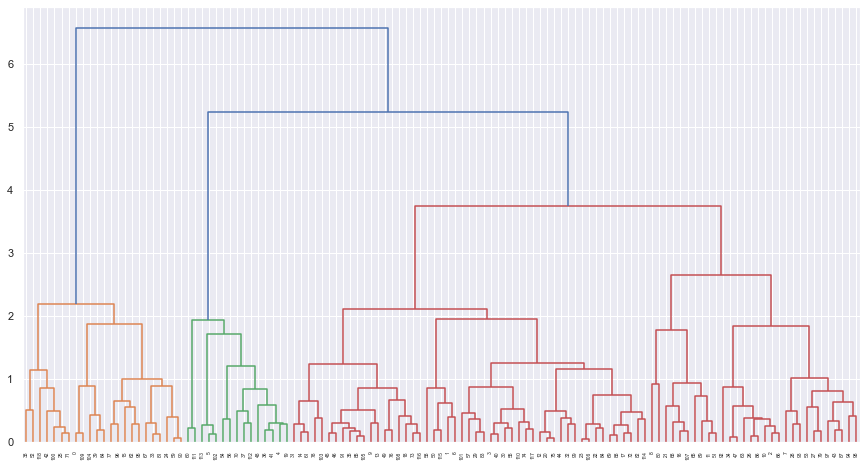

In [53]:
# Complete Linkage
# plt.rcParams['figure.figsize'] = [15,8]
mergings = linkage(df_pca_numeric_data, method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [54]:
df_pca_hc = df_pca_final.copy()
df_pca_hc = df_pca_hc.drop('cluster_id',axis=1)
df_pca_hc.head()

country    PC_1    PC_2    PC_3
0          Afghanistan -2.6374  1.4690 -0.5414
1              Algeria -0.4576 -0.6733  0.9619
2  Antigua and Barbuda  0.6498 -1.0244 -0.2501
3              Armenia -0.3327 -1.2745  0.1766
4            Australia  3.1804 -0.2508 -0.1169

In [55]:
# Cut the tree at height of approx 3 to get 4 clusters and see if it get any better cluster formation.
clusterCut = pd.Series(cut_tree(mergings, n_clusters=4).reshape(-1,))

In [56]:
df_hc = pd.concat([df_pca_hc, clusterCut], axis=1)
df_hc.columns = ['country', 'PC_1', 'PC_2','PC_3','Cluster_Id']
df_hc.sample(5)

country    PC_1    PC_2    PC_3  Cluster_Id
103           Tajikistan -1.3758 -0.1634  0.2775           1
63                Latvia  0.6664 -1.2104 -0.4982           2
2    Antigua and Barbuda  0.6498 -1.0244 -0.2501           2
37                France  2.8922 -0.3072 -0.2125           3
66             Lithuania  0.7779 -1.0044 -0.2033           2

In [57]:
px.scatter_3d(df_hc, x='PC_1', y='PC_2', z='PC_3', color='Cluster_Id')

Cluster 4 seems to have 2 distant points, not properly formed.

In [58]:
df_merge_hc = pd.merge(df_country, df_hc, on= 'country')
df_merge_hc

country  child_mort    exports    health    imports  income  \
0            Afghanistan     90.2000    55.3000   41.9174   248.2970    1610   
1                Algeria     27.3000  1712.6400  185.9820  1400.4400   12900   
2    Antigua and Barbuda     10.3000  5551.0000  735.6600  7185.8000   19100   
3                Armenia     18.1000   669.7600  141.6800  1458.6600    6700   
4              Australia      4.8000 10276.2000 4530.8700 10847.1000   41400   
..                   ...         ...        ...       ...        ...     ...   
114              Uruguay     10.6000  3129.7000  993.6500  3022.6000   17100   
115           Uzbekistan     36.3000   437.4600   80.1780   393.3000    4240   
116              Vanuatu     29.2000  1384.0200  155.9250  1565.1900    2950   
117              Vietnam     23.3000   943.2000   89.6040  1050.6200    4490   
118                Yemen     56.3000   393.0000   67.8580   450.6400    4480   

     inflation  life_expec  total_fer   gdpp    PC_1    PC_2    PC_3  \
0       9.4400     56.2000     5.8200    553 -2.6374  1.4690 -0.5414   
1      16.1000     76.5000     2.8900   4460 -0.4576 -0.6733  0.9619   
2       1.4400     76.8000     2.1300  12200  0.6498 -1.0244 -0.2501   
3       7.7700     73.3000     1.6900   3220 -0.3327 -1.2745  0.1766   
4       1.1600     82.0000     1.9300  51900  3.1804 -0.2508 -0.1169   
..         ...         ...        ...    ...     ...     ...     ...   
114     4.9100     76.4000     2.0800  11900  0.4561 -1.0982  0.0490   
115    16.5000     68.8000     2.3400   1380 -1.0306 -0.5629  0.7432   
116     2.6200     63.0000     3.5000   2970 -1.1750 -0.2813 -0.6704   
117    12.1000     73.1000     1.9500   1310 -0.5924 -1.0782  0.5106   
118    23.6000     67.5000     4.6700   1310 -1.8015  0.5908  1.1778   

     Cluster_Id  
0             0  
1             1  
2             2  
3             1  
4             3  
..          ...  
114           1  
115           1  
116           1  
117           1  
118           0  

[119 rows x 14 columns]

In [59]:
df_merge_hc.drop(['PC_1','PC_2','PC_3'], axis=1, inplace=True)
df_merge_hc.head(5)

country  child_mort    exports    health    imports  income  \
0          Afghanistan     90.2000    55.3000   41.9174   248.2970    1610   
1              Algeria     27.3000  1712.6400  185.9820  1400.4400   12900   
2  Antigua and Barbuda     10.3000  5551.0000  735.6600  7185.8000   19100   
3              Armenia     18.1000   669.7600  141.6800  1458.6600    6700   
4            Australia      4.8000 10276.2000 4530.8700 10847.1000   41400   

   inflation  life_expec  total_fer   gdpp  Cluster_Id  
0     9.4400     56.2000     5.8200    553           0  
1    16.1000     76.5000     2.8900   4460           1  
2     1.4400     76.8000     2.1300  12200           2  
3     7.7700     73.3000     1.6900   3220           1  
4     1.1600     82.0000     1.9300  51900           3

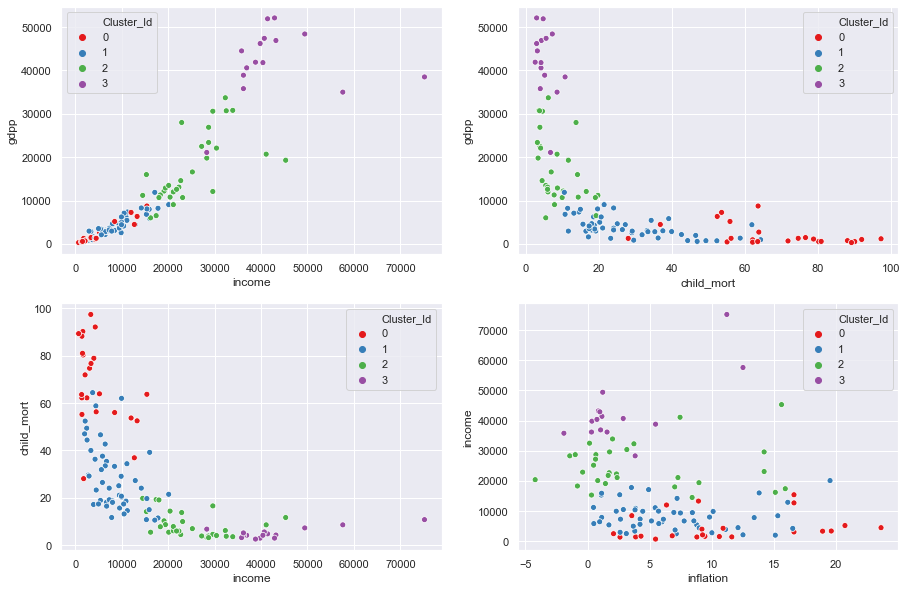

In [60]:
fig, axes = plt.subplots(2,2, figsize=(15, 10))

sns.scatterplot(x='income', y='gdpp', hue='Cluster_Id', data=df_merge_hc, palette='Set1',legend='full', ax=axes[0][0])
sns.scatterplot(x='child_mort', y='gdpp', hue='Cluster_Id', data=df_merge_hc, palette='Set1',legend='full', ax=axes[0][1])
sns.scatterplot(x='income', y='child_mort', hue='Cluster_Id', data=df_merge_hc, palette='Set1',legend='full', ax=axes[1][0])
sns.scatterplot(x='inflation', y='income', hue='Cluster_Id', data=df_merge_hc, palette='Set1',legend='full', ax=axes[1][1])


#### <font color=green> We have analyzed both K-means and Hierarchial clustering and found formed clusters are not identical. The clusters formed in both the cases are not that great but it's better in K-means as compared to Hierarchial. Hence, we proceed with the clusters formed by K-means and based on the information provided by the final clusters we will deduce the final list of countries which are in need of financial aid.

<a id="7"></a> <br>
# 7. Concluding results

In [61]:
cluster_0 = df_merged[df_merged['cluster_id'] == 0].sort_values('child_mort', ascending=False)
cluster_3 = df_merged[df_merged['cluster_id'] == 0].sort_values('child_mort', ascending=False)

In [62]:
clusters_res = cluster_0.append(cluster_3)
clusters_res.head(5)

country  child_mort   exports   health   imports  income  inflation  \
76        Myanmar     64.4000    1.0769  19.4636    0.6511    3720     7.0400   
108  Turkmenistan     62.0000 3387.7200 111.0000 1975.8000    9940     2.3100   
49          India     58.8000  305.1000  54.6750  365.8500    4410     8.9800   
103    Tajikistan     52.4000  109.9620  44.1324  432.4680    2110    12.5000   
9      Bangladesh     49.4000  121.2800  26.6816  165.2440    2440     7.1400   

     life_expec  total_fer  gdpp  cluster_id  
76      66.8000     2.4100   988           0  
108     67.9000     2.8300  4440           0  
49      66.2000     2.6000  1350           0  
103     69.6000     3.5100   738           0  
9       70.4000     2.3300   758           0

In [63]:
# Based on final clusters information we are going to deduce the final list.
clusters_res.describe()

child_mort   exports   health   imports    income  inflation  \
count     48.0000   48.0000  48.0000   48.0000   48.0000    48.0000   
mean      37.8875  896.5533 123.4549 1187.5125 5275.0000     6.5259   
std       13.1513  804.8060  85.6265  816.7771 2310.1036     4.6814   
min       17.4000    1.0769  19.4636    0.6511 1990.0000     0.5050   
25%       29.1750  434.4015  54.6022  458.8695 3242.5000     2.9950   
50%       35.8500  735.6900 112.1800  903.4350 5405.0000     5.4350   
75%       46.7000 1026.1425 167.0115 1993.2450 6507.5000     9.2350   
max       64.4000 3387.7200 406.1200 2495.5000 9940.0000    16.5000   

       life_expec  total_fer      gdpp  cluster_id  
count     48.0000    48.0000   48.0000     48.0000  
mean      68.9583     2.9537 2364.2500      0.0000  
std        2.6920     0.5216 1178.6602      0.0000  
min       63.0000     2.3300  592.0000      0.0000  
25%       66.6500     2.5950 1259.5000      0.0000  
50%       69.3000     2.7700 2715.0000      0.0000  
75%       71.3250     3.2450 3160.0000      0.0000  
max       73.5000     4.3400 4440.0000      0.0000

Let's not that forget that we have removed few countries during outlier treatment but we might have dropped some countries which might be in need of help. <br/> Let's iterate our final list based on the information from the clusters which were in need of aid.ie, Cluster 0 and Cluster 3

In [64]:
# We observed that mean child mortality is 38 for the selected clusters and hence 
# let's take all the countries with more than this child mortality.

df_final_list = df_country[df_country['child_mort']>38]
df_final_list.shape

(57, 10)

In [65]:
df_final_list.describe()

child_mort    exports   health    imports     income  inflation  \
count     57.0000    57.0000  57.0000    57.0000    57.0000    57.0000   
mean      85.6000   873.3094 110.7558   815.5167  4050.7544    11.1734   
std       34.4170  2122.7727 157.6646  1447.0374  5326.0415    14.2444   
min       39.2000     1.0769  12.8212     0.6511   609.0000     0.8850   
25%       62.0000   103.2500  31.9778   193.5780  1420.0000     3.8700   
50%       80.3000   196.3440  50.9580   365.8500  2180.0000     8.7800   
75%      109.0000   589.4900  95.8320   734.4000  4280.0000    14.0000   
max      208.0000 14671.8000 766.0800 10071.9000 33700.0000   104.0000   

       life_expec  total_fer       gdpp  
count     57.0000    57.0000    57.0000  
mean      60.8439     4.5781  1901.1228  
std        6.9371     1.3245  2754.7326  
min       32.1000     1.9200   231.0000  
25%       57.3000     3.4600   563.0000  
50%       60.8000     4.8800   967.0000  
75%       65.9000     5.4000  1490.0000  
max       72.1000     7.4900 17100.0000

In [66]:
# We observed that mean income is 4050 for the selected clusters and hence 
# let's take all the countries with less than this income .

df_final_list1 = df_final_list[df_final_list['income']<=4050]
df_final_list1.shape

(42, 10)

In [67]:
df_final_list1.describe()

child_mort  exports   health   imports    income  inflation  \
count     42.0000  42.0000  42.0000   42.0000   42.0000    42.0000   
mean      91.2310 201.5849  62.2821  393.1977 1925.0714     8.4546   
std       34.7954 175.2790  75.4630  404.1887  876.1618     6.3187   
min       40.0000   1.0769  12.8212    0.6511  609.0000     0.8850   
25%       63.8000  79.7758  31.0785  170.3670 1360.0000     3.2900   
50%       88.7500 131.6295  42.0538  267.0920 1775.0000     6.9250   
75%      110.5000 280.3650  55.8524  431.4295 2470.0000    12.2500   
max      208.0000 672.1000 406.1200 2316.6000 3980.0000    26.5000   

       life_expec  total_fer      gdpp  
count     42.0000    42.0000   42.0000  
mean      59.8476     4.8617  879.8571  
std        7.2129     1.2186  638.5738  
min       32.1000     2.3300  231.0000  
25%       56.5750     4.2950  502.7500  
50%       60.1000     5.0550  705.0000  
75%       65.2000     5.5275 1105.0000  
max       71.1000     7.4900 3600.0000

In [68]:
# We observed that mean gdpp is 880 for the selected clusters and hence 
# let's take all the countries with less than this gdpp .

df_final_list2 = df_final_list1[df_final_list1['gdpp']<=880]
df_final_list2.shape

(27, 10)

In [69]:
df_final_list2['country']

0                   Afghanistan
12                   Bangladesh
17                        Benin
25                 Burkina Faso
26                      Burundi
27                     Cambodia
31     Central African Republic
36                      Comoros
37             Congo, Dem. Rep.
50                      Eritrea
56                       Gambia
63                       Guinea
64                Guinea-Bissau
66                        Haiti
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
106                  Mozambique
109                       Nepal
112                       Niger
126                      Rwanda
132                Sierra Leone
146                  Tajikistan
147                    Tanzania
150                        Togo
155                      Uganda
Name: country, dtype: object

In [70]:
df_list_childmort = pd.DataFrame(df_final_list2.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))

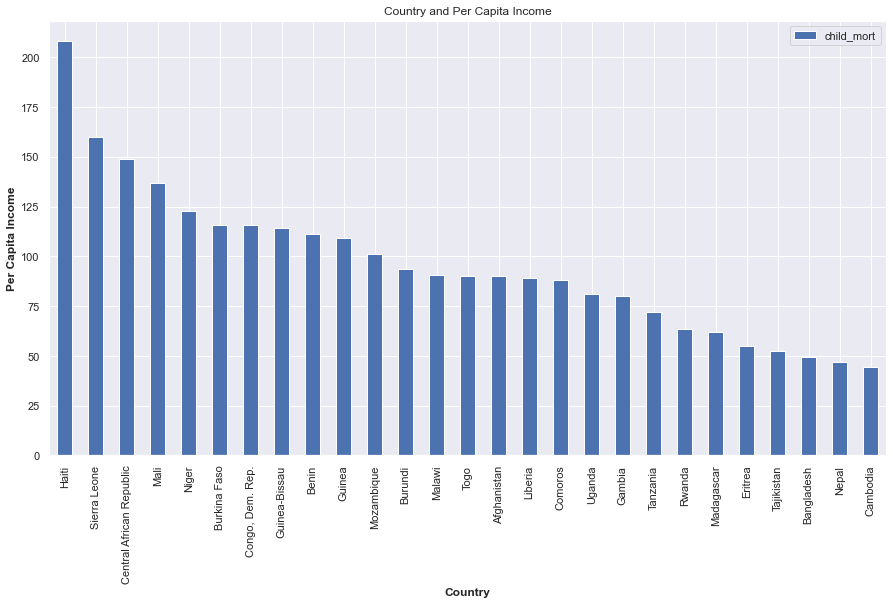

In [71]:
plt.rcParams['figure.figsize'] = [15,8]
df_list_childmort.plot.bar()
plt.title('Country and Per Capita Income')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Per Capita Income", fontsize = 12, fontweight = 'bold')
plt.show()

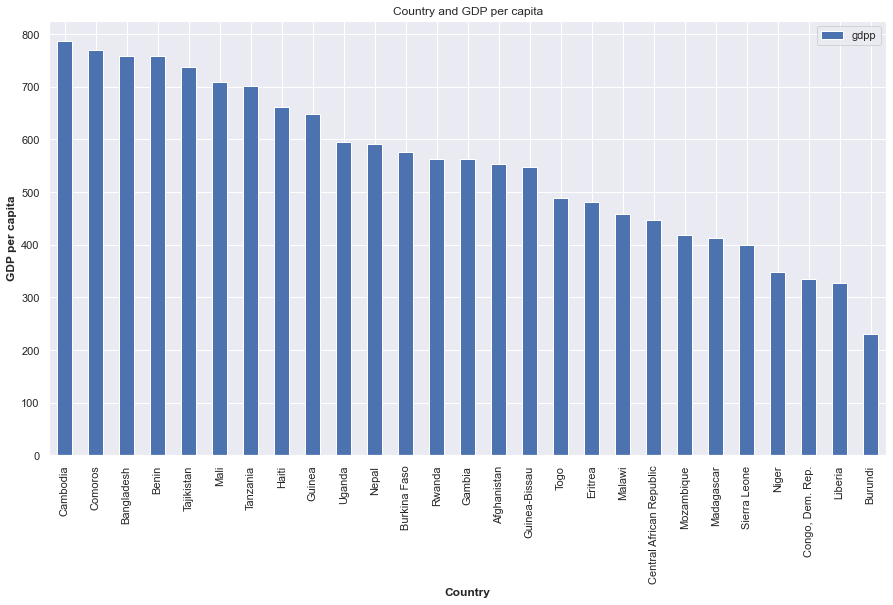

In [72]:
# BarPlot for GDP Per Capita of countries which are in need of aid
# plt.rcParams['figure.figsize'] = [15,8]
df_list_gdpp = pd.DataFrame(df_final_list2.groupby(['country'])['gdpp'].mean().sort_values(ascending = False))
df_list_gdpp.plot.bar()
plt.title('Country and GDP per capita')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("GDP per capita", fontsize = 12, fontweight = 'bold')
plt.show()

### Conclusion
We have used Principal Component Analysis to reduce the variables involved. Then clustered countries based on those PCs. Later we identified some factors like child mortality, income and gdpp which played a vital role in deciding the development status of the country and builded clusters of countries based on that. <br/> 
Based on those clusters we have identified the above list of countries which should be priorotized for financial aid and social projects. <br/> The list of countries are subject to change as it is based on the few factors like Number of components chosen, Number of Clusters chosen, Clustering method used etc.which we have used to build the model.